In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
assignds=pd.read_csv("transfusion.csv", sep=",")
assignds.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [3]:
assignds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
assignds.shape

(748, 5)

In [5]:
assignds.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
# Target Variable

assignds['whether he/she donated blood in March 2007'].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [7]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(assignds))
print(z)

[[0.92789873 7.62334626 7.62334626 2.61563344 1.78948238]
 [1.17511806 1.28273826 1.28273826 0.2578809  1.78948238]
 [1.0515084  1.79684161 1.79684161 0.02947053 1.78948238]
 ...
 [1.66790417 0.43093957 0.43093957 1.13782607 0.55882081]
 [3.64565877 0.77367514 0.77367514 0.19367135 0.55882081]
 [7.72477762 0.77367514 0.77367514 1.54832812 0.55882081]]


In [8]:
threshold = 3
print(np.where(z > 3))

(array([  0,   0,   4,   4,   9,   9, 115, 115, 341, 341, 495, 496, 497,
       498, 499, 500, 500, 502, 502, 503, 503, 504, 504, 505, 505, 517,
       517, 528, 528, 746, 747], dtype=int64), array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 0], dtype=int64))


In [9]:
assignds = assignds[(z < 3).all(axis=1)]
assignds.shape

(729, 5)

<AxesSubplot:ylabel='Frequency'>

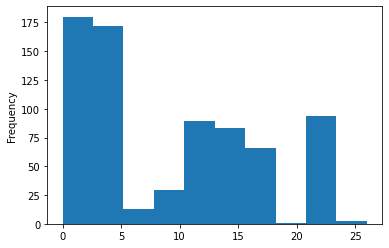

In [10]:
# Visualizations
# Recency(months)

assignds['Recency (months)'].plot(kind = 'hist')

array([[<AxesSubplot:title={'center':'Frequency (times)'}>]], dtype=object)

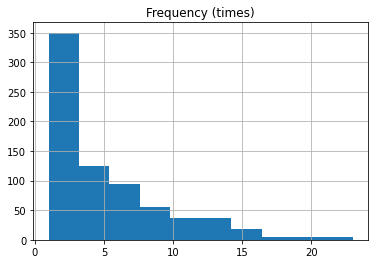

In [11]:
# Frequency (months)

assignds.hist(column = 'Frequency (times)')

In [12]:
Monetary = pd.qcut(assignds['Monetary (c.c. blood)'], q=4, labels = ["Less than 500","Between 500 and 1000", "Between 1000 and 1750", "Greater than 1750"])
Monetary.value_counts()

Less than 500            264
Greater than 1750        160
Between 1000 and 1750    157
Between 500 and 1000     148
Name: Monetary (c.c. blood), dtype: int64

Text(0.5, 1.0, 'Histogram of Amount of Blood donated')

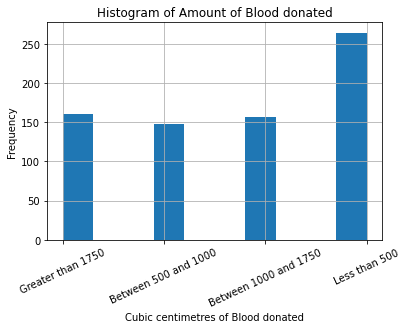

In [13]:
Monetary.hist(xrot = 25)
plt.xlabel("Cubic centimetres of Blood donated")
plt.ylabel("Frequency")
plt.title("Histogram of Amount of Blood donated")

<AxesSubplot:>

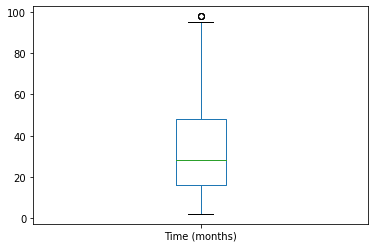

In [14]:
assignds['Time (months)'].plot(kind = 'box')

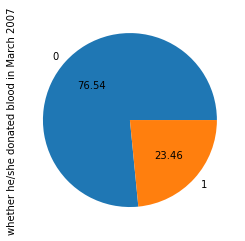

In [15]:
assignds['whether he/she donated blood in March 2007'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

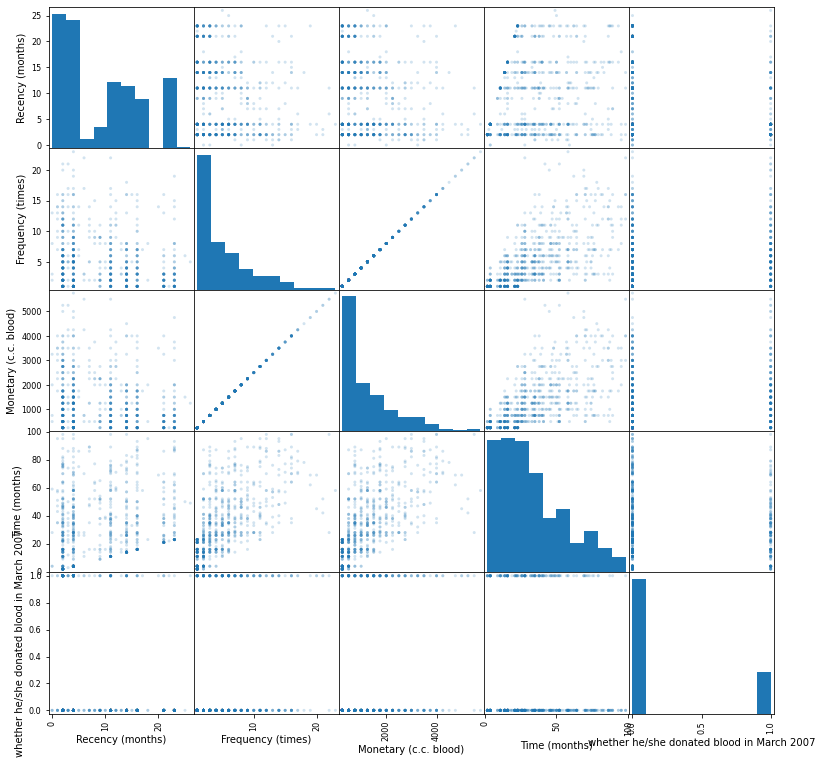

In [16]:
# Relationship between attributes

from pandas.plotting import scatter_matrix
scatter_matrix(assignds,alpha=0.2,diagonal='hist',figsize=(13,13))
plt.show()

In [17]:
# DATA MODELLING

Data = assignds.drop(['whether he/she donated blood in March 2007'], axis = 1)
target = assignds['whether he/she donated blood in March 2007']

In [18]:
# SCALING THE VALUES

from sklearn import preprocessing
data = preprocessing.MinMaxScaler().fit_transform(Data)
data = pd.DataFrame(data)
data.columns = Data.columns
data.head(10)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.000000,0.545455,0.545455,0.270833
1,0.038462,0.681818,0.681818,0.343750
2,0.076923,0.863636,0.863636,0.447917
3,0.153846,0.136364,0.136364,0.020833
4,0.076923,0.272727,0.272727,0.125000
5,0.038462,0.500000,0.500000,0.343750
6,0.076923,0.363636,0.363636,0.208333
7,0.153846,1.000000,1.000000,0.583333
8,0.000000,0.090909,0.090909,0.020833
9,0.076923,0.409091,0.409091,0.270833


In [19]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=6,stratify = target)

In [20]:
print("The Shape of training descriptive data is ", X_train.shape)
print("The Shape of training target data is ", y_train.shape)
print("The Shape of test descriptive data is ", X_test.shape)
print("The Shape of test target data is ", y_test.shape)

The Shape of training descriptive data is  (583, 4)
The Shape of training target data is  (583,)
The Shape of test descriptive data is  (146, 4)
The Shape of test target data is  (146,)


In [21]:
# FITTING THE MODELS
# KFOLD-CROSS VALIDATION

from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=6)

In [22]:
# Grid Search

parameters_KNN = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 
              'p': [1, 2, 5],
              'weights':['uniform','distance']}

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=parameters_KNN, 
                      cv=cv_method,
                      scoring='accuracy',
                      return_train_score=True)


In [23]:
gs_KNN.fit(data,target)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=6),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 5], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [24]:
gs_KNN.best_params_

{'n_neighbors': 9, 'p': 5, 'weights': 'uniform'}

In [25]:
# FITTING THE BEST MODEL OBTAINED FROM GRID SEARCH

knn = KNeighborsClassifier(n_neighbors = 9, p = 5, weights = 'uniform' )
model1 = knn.fit(X_train, y_train)


In [26]:
y_pred = model1.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.columns = ['y_pred_No', 'y_pred_Yes']
cm.index = ['y_test_No','y_test_Yes']
print(cm)

            y_pred_No  y_pred_Yes
y_test_No         109           3
y_test_Yes         26           8


In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       112
           1       0.73      0.24      0.36        34

    accuracy                           0.80       146
   macro avg       0.77      0.60      0.62       146
weighted avg       0.79      0.80      0.76       146



In [29]:
# DECISION TREE CLASSIFIER
# GRID SEARCH

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dT_classifier = DecisionTreeClassifier(random_state=6)

parameters_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'splitter' : ['best','random']}

gs_DT = GridSearchCV(estimator=dT_classifier, 
                     param_grid=parameters_DT, 
                     cv=cv_method,
                     scoring='accuracy')

gs_DT.fit(data, target);

In [30]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [31]:
# FITTING THE BEST MODEL

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, splitter = 'best')
DT_Model = clf.fit(X_train, y_train)

In [32]:
y_pred1 = DT_Model.predict(X_test)

In [33]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred1))
cm.columns = ['y_pred1_No', 'y_pred1_Yes']
cm.index = ['y_test_No','y_test_Yes'] 
print(cm)

            y_pred1_No  y_pred1_Yes
y_test_No          106            6
y_test_Yes          17           17


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       112
           1       0.74      0.50      0.60        34

    accuracy                           0.84       146
   macro avg       0.80      0.72      0.75       146
weighted avg       0.83      0.84      0.83       146



In [35]:
from sklearn import tree
with open('blood_transfusion.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f,
feature_names=('Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'),class_names=('whether he/she donated blood in March 2007'), filled=True, rounded=True,
special_characters=True)